<div class='bar_title'></div>

*Decision Support Systems*

# Headline

student1, student2, student3, student,4 <br>

Winter Semester 19/20

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Standard-LP" data-toc-modified-id="Standard-LP-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Standard LP</a></span></li><li><span><a href="#Robust-Optimization" data-toc-modified-id="Robust-Optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Robust Optimization</a></span></li><li><span><a href="#Chance-Constraints" data-toc-modified-id="Chance-Constraints-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Chance Constraints</a></span></li><li><span><a href="#Stochastic-Programming-1" data-toc-modified-id="Stochastic-Programming-1-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stochastic Programming 1</a></span></li><li><span><a href="#Stochastic-Programming-2" data-toc-modified-id="Stochastic-Programming-2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Stochastic Programming 2</a></span></li></ul></div>

In [1]:
!pip install pulp
from pulp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Data Preparation

In [2]:
df_solar = pd.read_csv('https://github.com/wi3jmu/DSS1920/raw/master/Data/Solar_Data.csv', index_col=0)
df_consum = pd.read_csv('https://github.com/wi3jmu/DSS1920/raw/master/Data/Consum_Data.csv', index_col=0)

In [3]:
# we want to have day 0-365 instead of dates
days = df_consum.reset_index().index.tolist()

df_consum=df_consum.reset_index(drop=True)
df_solar=df_solar.reset_index(drop=True)

In [4]:
df_consum.head()

,consum_0,consum_1,consum_2,consum_3,consum_4,consum_5,consum_6,consum_7,consum_8,consum_9,...,consum_490,consum_491,consum_492,consum_493,consum_494,consum_495,consum_496,consum_497,consum_498,consum_499
0,79.026813,79.166693,79.603195,79.321704,78.426286,79.815542,78.060443,77.979138,79.978409,80.389137,...,76.788895,80.680322,78.984695,80.012801,79.185524,79.695756,78.573123,79.163573,78.000456,80.359045
1,78.145723,77.121751,77.307550,76.807391,79.711418,76.460352,75.988529,77.208810,78.901799,78.137209,...,80.060448,77.694551,76.057983,79.814416,79.439387,77.981815,78.109007,78.377900,78.283468,78.697465
2,67.557088,67.551236,66.104895,67.823331,67.983887,67.317197,68.318782,68.897925,68.324301,68.578712,...,66.727674,67.646057,68.218354,66.893765,67.366920,66.888175,66.818032,66.626834,68.943628,66.809443
3,48.924967,51.043785,50.011764,48.057107,48.912827,49.631908,49.234540,50.298924,49.099525,49.465574,...,47.933095,49.864442,50.377888,48.651444,50.087791,51.411981,48.692300,49.715442,48.837446,47.407127
4,64.006552,64.603618,66.193391,64.910703,64.366256,64.775522,65.708589,63.506945,64.870407,65.495740,...,65.216538,62.774642,63.506108,63.539502,64.806208,63.774012,64.974321,63.424658,64.080026,63.653913


In [5]:
df_solar.head()

,solar_0,solar_1,solar_2,solar_3,solar_4,solar_5,solar_6,solar_7,solar_8,solar_9
0,32.882083,33.528512,33.277529,33.873368,32.593289,33.582332,34.723709,33.890378,33.931324,34.700612
1,12.709871,12.278981,11.906540,13.306186,11.247804,11.964842,13.746997,13.189224,14.020067,12.965316
2,73.700604,73.458066,73.794748,73.397938,73.936536,75.131642,71.898934,74.021681,74.778660,74.111016
3,65.019633,62.821818,63.353230,63.795378,64.872601,63.624012,62.227826,64.055256,63.332238,63.844992
4,68.856726,67.962777,66.685048,68.398001,67.465437,69.204134,67.827804,68.758371,68.372007,67.796201


In [6]:
# Dictionaries for solar and consumption
solar = df_solar.transpose().to_dict()
consum = df_consum.transpose().to_dict()

# Mean and standard deviation for solar and consumption
solar_std = df_solar.transpose().std()
solar_mean = df_solar.transpose().mean()

consum_std = df_consum.transpose().std()
consum_mean = df_consum.transpose().mean()

## Standard LP

In [7]:
# Parameters
batterie_cost = 84/15
recycling_cost = 150
buying_price = 0.3

In [8]:
# Variables
solar_elec = LpVariable.dicts("solar_elec", days, lowBound=0, cat='Continuous')
buying_elec = LpVariable.dicts("buying_elec", days, lowBound=0, cat='Continuous')
battery_elec = LpVariable.dicts("battery_elec", days, lowBound=0, cat='Continuous')

battery_status = LpVariable.dicts("battery_status", days, lowBound=0, cat='Continuous')
battery_charge = LpVariable.dicts("battery_charge", days, lowBound=0, cat='Continuous')

batterie_kap = LpVariable("batterie_kap", lowBound=0, cat='Continuous')

Optimal
4573.776773859999
27.080882


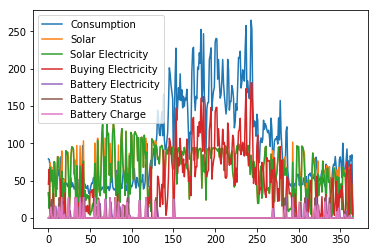

,Consumption,Solar,Solar Electricity,Buying Electricity,Battery Electricity,Battery Status,Battery Charge
0,79.043769,33.698314,33.698314,45.345455,0.0,0.000000,0.000000
1,78.107283,12.733583,12.733583,65.373700,0.0,0.000000,0.000000
2,67.877886,73.822982,67.877886,0.000000,0.0,5.945096,5.945096
3,49.243723,63.694698,49.243723,0.000000,0.0,20.396072,14.450976
4,63.972130,68.132651,63.972130,0.000000,0.0,24.556593,4.160521


In [9]:
# Create model
m = LpProblem("Solar System", sense=pulp.LpMinimize)

# Objective
m += lpSum([150 + batterie_cost * batterie_kap] + [buying_price * buying_elec[t] for t in days])

# Constraints
for t in days:
    m += solar_elec[t] + buying_elec[t] + battery_elec[t] >= consum_mean[t]
    
    m += solar_elec[t] + battery_charge[t] <= solar_mean[t]
    
    if (t==0):   
        m += 0 - battery_elec[t] + battery_charge[t] == battery_status[t]
    else:
        m += battery_status[t-1] - battery_elec[t] + battery_charge[t] == battery_status[t]
        
    m += battery_status[t] <= batterie_kap
    
# Solve problem
m.solve()
print (LpStatus[m.status])
obj = value(m.objective)
print (obj)

kap = batterie_kap.varValue
print(batterie_kap.varValue)

out = pd.DataFrame([[consum_mean[t], solar_mean[t],  solar_elec[t].varValue, buying_elec[t].varValue, battery_elec[t].varValue,
                     battery_status[t].varValue, battery_charge[t].varValue] for t in days],
                   columns = ['Consumption', 'Solar', 'Solar Electricity', 'Buying Electricity', 'Battery Electricity',
                              'Battery Status', 'Battery Charge'])
out.plot()
plt.show()
out.head()

## Robust Optimization

Optimal
4931.157830228003
30.079138


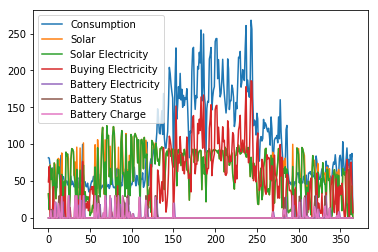

,Consumption,Solar,Solar Electricity,Buying Electricity,Battery Electricity,Battery Status,Battery Charge
0,81.529607,32.593289,32.593289,48.936318,0.000000,0.000000,0.000000
1,80.987056,11.247804,11.247804,69.739252,0.000000,0.000000,0.000000
2,70.784051,71.898934,70.784051,0.000000,0.000000,1.114882,1.114882
3,52.065457,62.227826,52.065457,0.000000,0.000000,11.277251,10.162369
4,67.389934,66.685048,66.685048,0.000000,0.704886,10.572365,0.000000


In [10]:
# Create model
m1 = LpProblem("Solar System", sense=pulp.LpMinimize)

# Objective
m1 += lpSum([150+ batterie_cost * batterie_kap] + [buying_price * buying_elec[t] for t in days])

# Constraints
for t in days:
    m1 += solar_elec[t] + buying_elec[t] + battery_elec[t] >= max(consum[t].values())
    
    m1 += solar_elec[t] + battery_charge[t] <= min(solar[t].values())
    
    if (t==0):   
        m1 += 0 - battery_elec[t] + battery_charge[t] == battery_status[t]
    else:
        m1 += battery_status[t-1] - battery_elec[t] + battery_charge[t] == battery_status[t]
        
    m1 += battery_status[t] <= batterie_kap
    
# Solve problem
m1.solve()
print (LpStatus[m1.status])
obj1 = value(m1.objective)
print (obj1)

kap1 = batterie_kap.varValue
print(batterie_kap.varValue)

out1 = pd.DataFrame([[max(consum[t].values()), min(solar[t].values()),  solar_elec[t].varValue, buying_elec[t].varValue, battery_elec[t].varValue,
                     battery_status[t].varValue, battery_charge[t].varValue] for t in days],
                   columns = ['Consumption', 'Solar', 'Solar Electricity', 'Buying Electricity', 'Battery Electricity',
                              'Battery Status', 'Battery Charge'])
out1.plot()
plt.show()
out1.head()

## Chance Constraints

Optimal
4792.291993814999
31.117698


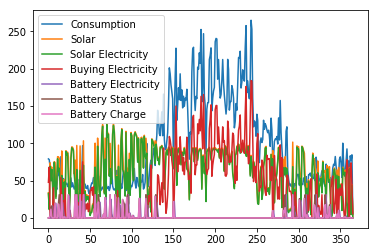

,Consumption,Solar,Solar Electricity,Buying Electricity,Battery Electricity,Battery Status,Battery Charge
0,79.043769,33.698314,32.593289,47.709445,0.0,0.000000,0.000000
1,78.107283,12.733583,11.247804,68.098645,0.0,0.000000,0.000000
2,67.877886,73.822982,69.121426,0.000000,0.0,2.777508,2.777508
3,49.243723,63.694698,50.530544,0.000000,0.0,14.474789,11.697282
4,63.972130,68.132651,65.179455,0.000000,0.0,15.980383,1.505593


In [11]:
# Create model
m2 = LpProblem("Solar System", sense=pulp.LpMinimize)

# Objective
m2 += lpSum([150+ batterie_cost * batterie_kap] + [buying_price * buying_elec[t] for t in days])

# Constraints
for t in days:
    m2 += solar_elec[t] + buying_elec[t] + battery_elec[t] >= consum_mean[t] + norm.ppf(0.90)*consum_std[t]
    
    m2 += solar_elec[t] + battery_charge[t] <= min(solar[t].values())
    
    if (t==0):   
        m2 += 0 - battery_elec[t] + battery_charge[t] == battery_status[t]
    else:
        m2 += battery_status[t-1] - battery_elec[t] + battery_charge[t] == battery_status[t]
        
    m2 += battery_status[t] <= batterie_kap
    
# Solve problem
m2.solve()
print (LpStatus[m2.status])
obj2 = value(m2.objective)
print (obj2)

kap2 = batterie_kap.varValue
print(batterie_kap.varValue)

out2 = pd.DataFrame([[consum_mean[t], solar_mean[t], solar_elec[t].varValue, buying_elec[t].varValue, battery_elec[t].varValue,
                     battery_status[t].varValue, battery_charge[t].varValue] for t in days],
                   columns = ['Consumption', 'Solar', 'Solar Electricity', 'Buying Electricity', 'Battery Electricity',
                              'Battery Status', 'Battery Charge'])
out2.plot()
plt.show()
out2.head()

## Stochastic Programming 1

In [12]:
# different scenarios for the buying price
buying_price = [0.28, 0.3, 0.32, 0.35, 0.4, 0.5]
scenarios = range(len(buying_price))
days_scenarios = [(t,s) for s in scenarios for t in days]

In [14]:
# new variables depending on the scenario
solar_elec = LpVariable.dicts("solar_elec", days_scenarios, lowBound=0, cat='Continuous')
buying_elec = LpVariable.dicts("buying_elec", days_scenarios, lowBound=0, cat='Continuous')
battery_elec = LpVariable.dicts("battery_elec", days_scenarios, lowBound=0, cat='Continuous')

battery_status = LpVariable.dicts("battery_status", days_scenarios, lowBound=0, cat='Continuous')
battery_charge = LpVariable.dicts("battery_charge", days_scenarios, lowBound=0, cat='Continuous')

batterie_kap = LpVariable("batterie_kap", lowBound=0, cat='Continuous')

Optimal
5659.989075837005
33.854091


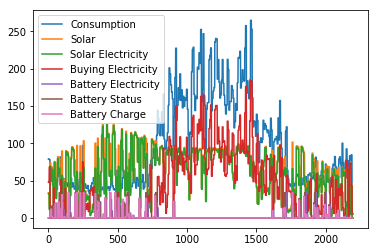

,Consumption,Solar,Solar Electricity,Buying Electricity,Battery Electricity,Battery Status,Battery Charge
0,79.043769,33.698314,32.593289,47.709445,0.0,0.0,0.0
1,79.043769,33.698314,32.593289,47.709445,0.0,0.0,0.0
2,79.043769,33.698314,32.593289,47.709445,0.0,0.0,0.0
3,79.043769,33.698314,32.593289,47.709445,0.0,0.0,0.0
4,79.043769,33.698314,32.593289,47.709445,0.0,0.0,0.0


In [15]:
# Create model
m3 = LpProblem("Solar System", sense=pulp.LpMinimize)

# Objective
m3 +=  (1/len(scenarios))*lpSum([len(scenarios)*150+ len(scenarios)*batterie_cost*batterie_kap] 
                   + [buying_price[s] * buying_elec[t,s] for t in days for s in scenarios])

# Constraints
for t in days:
    for s in scenarios:
        m3 += solar_elec[t,s] + buying_elec[t,s] + battery_elec[t,s] >= consum_mean[t] + norm.ppf(0.90)*consum_std[t]
    
        m3 += solar_elec[t,s] + battery_charge[t,s] <= min(solar[t].values())
    
        if (t==0):   
            m3 += 0 - battery_elec[t,s] + battery_charge[t,s] == battery_status[t,s]
        else:
            m3 += battery_status[t-1,s] - battery_elec[t,s] + battery_charge[t,s] == battery_status[t,s]
        
        m3 += battery_status[t,s] <= batterie_kap
    
# Solve problem
m3.solve()
print (LpStatus[m3.status])
obj3 = value(m3.objective)
print (obj3)

kap3 = batterie_kap.varValue
print(batterie_kap.varValue)

out3 = pd.DataFrame([[consum_mean[t], solar_mean[t],  solar_elec[t,s].varValue, buying_elec[t,s].varValue, battery_elec[t,s].varValue,
                     battery_status[t,s].varValue, battery_charge[t,s].varValue] for t in days for s in scenarios],
                   columns = ['Consumption', 'Solar', 'Solar Electricity', 'Buying Electricity', 'Battery Electricity',
                              'Battery Status', 'Battery Charge'])
out3.plot()
plt.show()
out3.head()

## Stochastic Programming 2

In [26]:
buying_kap = LpVariable("buying_kap", lowBound=0, cat='Continuous')
buying_elec_disc = LpVariable.dicts("buying_elec_disc", days_scenarios, lowBound=0, cat='Continuous')

Optimal
4720.431649504039
31.682616
124.28938


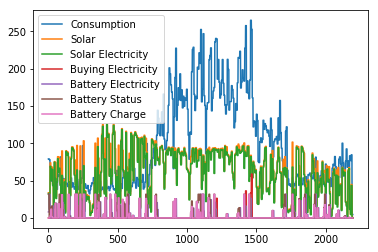

,Consumption,Solar,Solar Electricity,Buying Electricity,Battery Electricity,Battery Status,Battery Charge
0,79.043769,33.698314,32.593289,0.0,8.013414,31.682616,0.0
1,79.043769,33.698314,32.593289,0.0,8.013414,31.682616,0.0
2,79.043769,33.698314,32.593289,0.0,8.013414,31.682616,0.0
3,79.043769,33.698314,32.593289,0.0,8.013414,31.682616,0.0
4,79.043769,33.698314,32.593289,0.0,8.013414,31.682616,0.0


In [28]:
# Create model
m4 = LpProblem("Solar System", sense=pulp.LpMinimize)

# Objective 
m4 +=  (1/len(scenarios))*lpSum([len(scenarios) * 150]
                                + [len(scenarios) * batterie_cost * batterie_kap]
                                + [len(scenarios) * 1 * buying_kap]
                                + [buying_price[s] * buying_elec[t,s] for t in days for s in scenarios]
                                + [buying_price[s] * 0.8 * buying_elec_disc[t,s] for t in days for s in scenarios] )

# Constraints
for t in days:
    for s in scenarios:
        m4 += (solar_elec[t,s] + buying_elec[t,s] + buying_elec_disc[t,s] + battery_elec[t,s] >=
               consum_mean[t] + norm.ppf(0.90)*consum_std[t])
    
        m4 += solar_elec[t,s] + battery_charge[t,s] <= min(solar[t].values())
    
        if (t==0):   
            m4 += 0 - battery_elec[t,s] + buying_elec_disc[t,s] + battery_charge[t,s] == battery_status[t,s]
        else:
            m4 += (battery_status[t-1,s] - battery_elec[t,s] + battery_charge[t,s] 
                   == battery_status[t,s])
        
        m4 += battery_status[t,s] <= batterie_kap
        
        m4 += buying_elec_disc[t,s] <= buying_kap
    
# Solve problem
m4.solve()
print (LpStatus[m4.status])
obj4 = value(m4.objective)
print (obj4)

kap4 = batterie_kap.varValue
print(batterie_kap.varValue)
print(buying_kap.varValue)

out4 = pd.DataFrame([[consum_mean[t], solar_mean[t],  solar_elec[t,s].varValue, buying_elec[t,s].varValue, battery_elec[t,s].varValue,
                     battery_status[t,s].varValue, battery_charge[t,s].varValue] for t in days for s in scenarios],
                   columns = ['Consumption', 'Solar', 'Solar Electricity', 'Buying Electricity', 'Battery Electricity',
                              'Battery Status', 'Battery Charge'])
out4.plot()
plt.show()
out4.head()

In [29]:
pd.DataFrame([[obj,obj1,obj2,obj3,obj4],[kap,kap1,kap2,kap3,kap4]])

,0,1,2,3,4
0,4573.776774,4931.157830,4792.291994,5659.989076,4720.431650
1,27.080882,30.079138,31.117698,33.854091,31.682616
